In [1]:
import pandas as pd
import numpy as np
import random
import time


In [2]:
df = pd.read_csv("monday.csv", sep=";")

In [3]:
df

timestamp  customer_no  location
0     2019-09-02 07:03:00            1     dairy
1     2019-09-02 07:03:00            2     dairy
2     2019-09-02 07:04:00            3     dairy
3     2019-09-02 07:04:00            4     dairy
4     2019-09-02 07:04:00            5    spices
...                   ...          ...       ...
4879  2019-09-02 21:49:00         1442  checkout
4880  2019-09-02 21:49:00         1444  checkout
4881  2019-09-02 21:49:00         1445     dairy
4882  2019-09-02 21:50:00         1446     dairy
4883  2019-09-02 21:50:00         1447     fruit

[4884 rows x 3 columns]

In [4]:
df[df["customer_no"] == 6]

timestamp  customer_no  location
5    2019-09-02 07:04:00            6    spices
10   2019-09-02 07:05:00            6     dairy
62   2019-09-02 07:17:00            6    spices
71   2019-09-02 07:18:00            6    drinks
102  2019-09-02 07:25:00            6    spices
104  2019-09-02 07:26:00            6     dairy
117  2019-09-02 07:27:00            6    spices
135  2019-09-02 07:29:00            6  checkout

### Number of Customers in each Section

In [5]:
df[df["location"] == "spices"].count()

timestamp      750
customer_no    750
location       750
dtype: int64

In [6]:
df[df["location"] == "dairy"].count()

timestamp      895
customer_no    895
location       895
dtype: int64

In [7]:
df[df["location"] == "drinks"].count()

timestamp      797
customer_no    797
location       797
dtype: int64

In [8]:
df[df["location"] == "fruit"].count()

timestamp      1005
customer_no    1005
location       1005
dtype: int64

In [9]:
df[df["location"] == "checkout"].count()

timestamp      1437
customer_no    1437
location       1437
dtype: int64

### Number of Customers in each Section over Time

In [10]:
df_spices = df[df["location"] == "spices"]

In [11]:
#df_spices = df_spices.set_index("timestamp")

In [12]:
def customer_over_time(df):
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    customer_list = df["customer_no"].tolist()
    customer_count = []
    for i in customer_list:  
        customer_count.append(1)
    df["customer_count"] = customer_count
    df = df[["timestamp", "customer_count"]]
    df_sum = df.groupby("timestamp").sum()
    
    return df_sum

In [13]:
df_spices = customer_over_time(df_spices)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
df_spices["timestamp"] = pd.to_datetime(df["timestamp"])

In [15]:
df_spices["timestamp"].dtypes

dtype('<M8[ns]')

In [16]:
customer_list = df_spices["customer_no"].tolist()

KeyError: 'customer_no'

In [ ]:
customer_count = []
for i in customer_list:
    customer_count.append(1)
    
    

In [ ]:
df_spices["customer_count"] = customer_count

In [ ]:
df_aggregate = df_spices[["timestamp", "customer_count"]]

In [ ]:
df_spices_time = df_aggregate.groupby("timestamp").sum()

In [ ]:
df_spices_time.head()

### Spices over Time

In [ ]:
df_spices_time.plot(figsize=(20,13), title="spices")


### Fruits over Time

In [17]:
df_fruits = df[df["location"] == "fruit"]

In [18]:
df_fruits

timestamp  customer_no location
7     2019-09-02 07:04:00            8    fruit
15    2019-09-02 07:06:00           10    fruit
19    2019-09-02 07:06:00           14    fruit
27    2019-09-02 07:08:00           15    fruit
32    2019-09-02 07:11:00            7    fruit
...                   ...          ...      ...
4866  2019-09-02 21:47:00         1442    fruit
4867  2019-09-02 21:47:00         1443    fruit
4875  2019-09-02 21:49:00         1430    fruit
4876  2019-09-02 21:49:00         1433    fruit
4883  2019-09-02 21:50:00         1447    fruit

[1005 rows x 3 columns]

In [19]:
df_fruits_time = customer_over_time(df_fruits)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


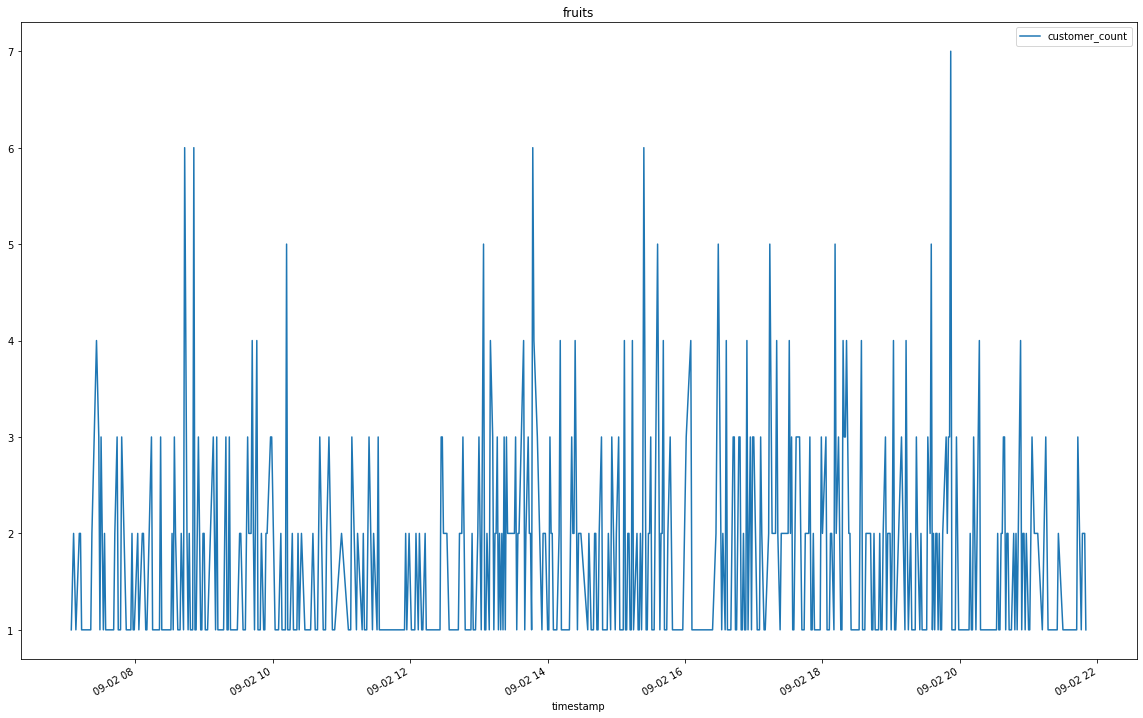

In [21]:
df_fruits_time.plot(figsize=(20,13), title="fruits")


### Dairy over Time

In [22]:
df_dairy = df[df["location"] == "dairy"]

In [23]:
df_dairy

timestamp  customer_no location
0     2019-09-02 07:03:00            1    dairy
1     2019-09-02 07:03:00            2    dairy
2     2019-09-02 07:04:00            3    dairy
3     2019-09-02 07:04:00            4    dairy
10    2019-09-02 07:05:00            6    dairy
...                   ...          ...      ...
4865  2019-09-02 21:47:00         1441    dairy
4868  2019-09-02 21:48:00         1430    dairy
4873  2019-09-02 21:48:00         1443    dairy
4881  2019-09-02 21:49:00         1445    dairy
4882  2019-09-02 21:50:00         1446    dairy

[895 rows x 3 columns]

In [24]:
df_dairy_time = customer_over_time(df_dairy)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
df_dairy_time

customer_count
timestamp                          
2019-09-02 07:03:00               2
2019-09-02 07:04:00               2
2019-09-02 07:05:00               1
2019-09-02 07:06:00               2
2019-09-02 07:07:00               1
...                             ...
2019-09-02 21:42:00               1
2019-09-02 21:47:00               2
2019-09-02 21:48:00               2
2019-09-02 21:49:00               1
2019-09-02 21:50:00               1

[527 rows x 1 columns]

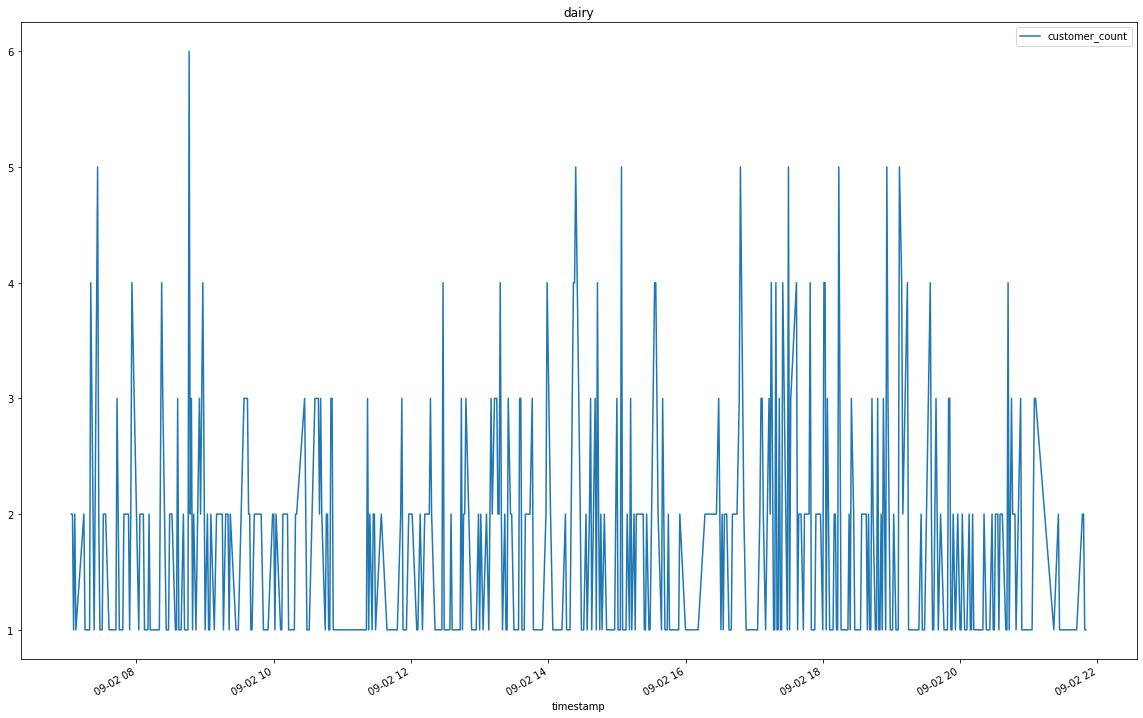

In [26]:
df_dairy_time.plot(figsize=(20,13), title="dairy")

### Drinks over Time

In [27]:
df_drinks = df[df["location"] == "drinks"]

In [28]:
df_drinks

timestamp  customer_no location
11    2019-09-02 07:05:00            7   drinks
16    2019-09-02 07:06:00           11   drinks
21    2019-09-02 07:07:00           12   drinks
39    2019-09-02 07:12:00           20   drinks
43    2019-09-02 07:13:00           19   drinks
...                   ...          ...      ...
4852  2019-09-02 21:43:00         1436   drinks
4857  2019-09-02 21:46:00         1434   drinks
4861  2019-09-02 21:46:00         1440   drinks
4870  2019-09-02 21:48:00         1433   drinks
4872  2019-09-02 21:48:00         1441   drinks

[797 rows x 3 columns]

In [29]:
df_drinks_time = customer_over_time(df_drinks)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
df_drinks_time

customer_count
timestamp                          
2019-09-02 07:05:00               1
2019-09-02 07:06:00               1
2019-09-02 07:07:00               1
2019-09-02 07:12:00               1
2019-09-02 07:13:00               2
...                             ...
2019-09-02 21:34:00               1
2019-09-02 21:41:00               1
2019-09-02 21:43:00               2
2019-09-02 21:46:00               2
2019-09-02 21:48:00               2

[514 rows x 1 columns]

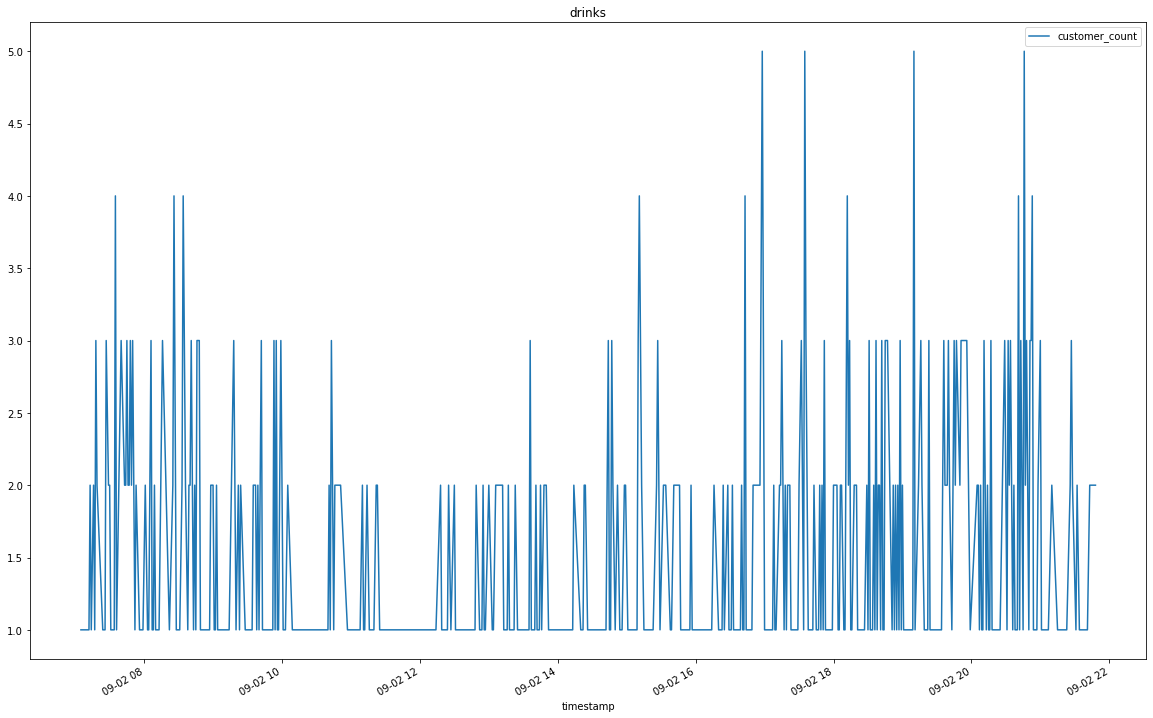

In [31]:
df_drinks_time.plot(figsize=(20,13), title="drinks")

### Checkout over Time 

In [32]:
df_checkout = df[df["location"] == "checkout"]

In [33]:
df_checkout

timestamp  customer_no  location
8     2019-09-02 07:05:00            1  checkout
9     2019-09-02 07:05:00            5  checkout
12    2019-09-02 07:06:00            2  checkout
13    2019-09-02 07:06:00            3  checkout
20    2019-09-02 07:07:00            8  checkout
...                   ...          ...       ...
4864  2019-09-02 21:47:00         1438  checkout
4869  2019-09-02 21:48:00         1431  checkout
4871  2019-09-02 21:48:00         1434  checkout
4879  2019-09-02 21:49:00         1442  checkout
4880  2019-09-02 21:49:00         1444  checkout

[1437 rows x 3 columns]

In [34]:
df_checkout_time = customer_over_time(df_checkout)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
df_checkout_time

customer_count
timestamp                          
2019-09-02 07:05:00               2
2019-09-02 07:06:00               2
2019-09-02 07:07:00               1
2019-09-02 07:08:00               3
2019-09-02 07:09:00               1
...                             ...
2019-09-02 21:44:00               1
2019-09-02 21:46:00               1
2019-09-02 21:47:00               2
2019-09-02 21:48:00               2
2019-09-02 21:49:00               2

[700 rows x 1 columns]

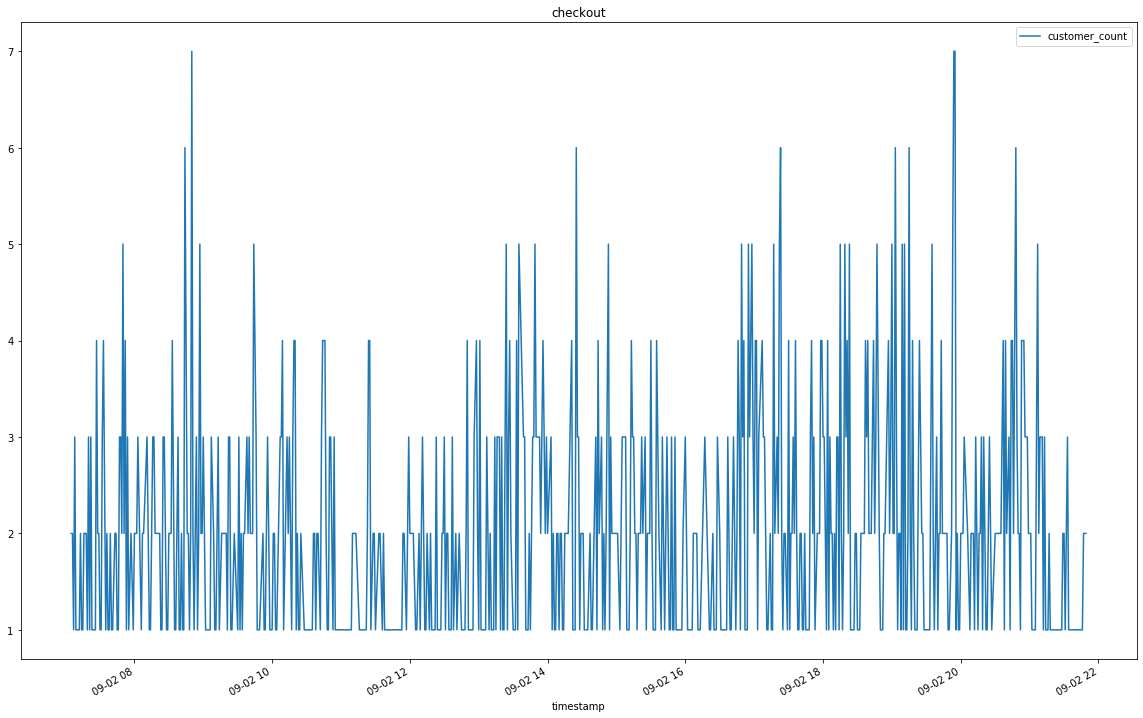

In [36]:
df_checkout_time.plot(figsize=(20,13), title="checkout")

### Time each Customer spent in the Market

In [37]:
#df.head()

In [38]:
#df[df["customer_no"] == 1]

In [39]:
#t2 = 

In [40]:
#pd.Timedelta(t2 - t1).seconds / 60.0

### Calculate the total Number of Customers in the supermarket over time

In [41]:
df["customer_no"].nunique()

1447

In [42]:
df.head(20)

timestamp  customer_no  location
0   2019-09-02 07:03:00            1     dairy
1   2019-09-02 07:03:00            2     dairy
2   2019-09-02 07:04:00            3     dairy
3   2019-09-02 07:04:00            4     dairy
4   2019-09-02 07:04:00            5    spices
5   2019-09-02 07:04:00            6    spices
6   2019-09-02 07:04:00            7    spices
7   2019-09-02 07:04:00            8     fruit
8   2019-09-02 07:05:00            1  checkout
9   2019-09-02 07:05:00            5  checkout
10  2019-09-02 07:05:00            6     dairy
11  2019-09-02 07:05:00            7    drinks
12  2019-09-02 07:06:00            2  checkout
13  2019-09-02 07:06:00            3  checkout
14  2019-09-02 07:06:00            9     dairy
15  2019-09-02 07:06:00           10     fruit
16  2019-09-02 07:06:00           11    drinks
17  2019-09-02 07:06:00           12    spices
18  2019-09-02 07:06:00           13     dairy
19  2019-09-02 07:06:00           14     fruit

In [43]:
test = df.groupby(["timestamp", "customer_no"]).sum()

In [44]:
test.head(20)

location
timestamp           customer_no          
2019-09-02 07:03:00 1               dairy
                    2               dairy
2019-09-02 07:04:00 3               dairy
                    4               dairy
                    5              spices
                    6              spices
                    7              spices
                    8               fruit
2019-09-02 07:05:00 1            checkout
                    5            checkout
                    6               dairy
                    7              drinks
2019-09-02 07:06:00 2            checkout
                    3            checkout
                    9               dairy
                    10              fruit
                    11             drinks
                    12             spices
                    13              dairy
                    14              fruit

In [45]:
def customer_count_total(df):

    list = []
    customer_count = []
    customer_list = df["customer_no"].tolist()

    for i in customer_list:

        if i in list:
            customer_count.append(0)

        else:
            customer_count.append(1)

        list.append(i)
        
    df["customer_count"] = customer_count
    
    df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour
    
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    
    df = df[["timestamp", "customer_count"]]
    df_sum = df.groupby("timestamp").sum()
    
    return df_sum

In [46]:
df_new = customer_count_total(df)

In [47]:
df_new

customer_count
timestamp                          
2019-09-02 07:03:00               2
2019-09-02 07:04:00               6
2019-09-02 07:05:00               0
2019-09-02 07:06:00               6
2019-09-02 07:07:00               2
...                             ...
2019-09-02 21:46:00               3
2019-09-02 21:47:00               3
2019-09-02 21:48:00               1
2019-09-02 21:49:00               1
2019-09-02 21:50:00               2

[874 rows x 1 columns]

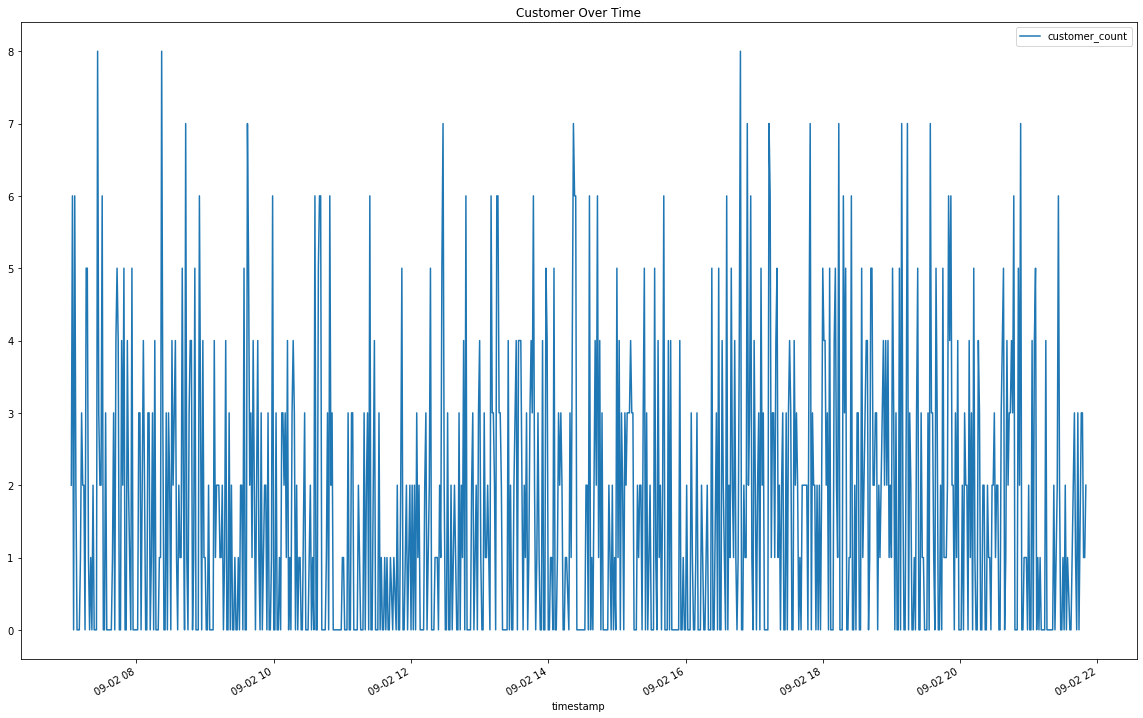

In [48]:
df_new.plot(figsize=(20,13), title="Customer Over Time")

### Estimate Revenue

### Transitions

In [49]:
# fruits spices diary drinks checkout

In [50]:
df

timestamp  customer_no  location  customer_count  hour
0    2019-09-02 07:03:00            1     dairy               1     7
1    2019-09-02 07:03:00            2     dairy               1     7
2    2019-09-02 07:04:00            3     dairy               1     7
3    2019-09-02 07:04:00            4     dairy               1     7
4    2019-09-02 07:04:00            5    spices               1     7
...                  ...          ...       ...             ...   ...
4879 2019-09-02 21:49:00         1442  checkout               0    21
4880 2019-09-02 21:49:00         1444  checkout               0    21
4881 2019-09-02 21:49:00         1445     dairy               1    21
4882 2019-09-02 21:50:00         1446     dairy               1    21
4883 2019-09-02 21:50:00         1447     fruit               1    21

[4884 rows x 5 columns]

### Calculate all Weekdays with Final Transition Function

In [51]:
df_mo = pd.read_csv("monday.csv", sep=";")
df_tu = pd.read_csv("tuesday.csv", sep=";")
df_we = pd.read_csv("wednesday.csv", sep=";")
df_th = pd.read_csv("thursday.csv", sep=";")
df_fr = pd.read_csv("friday.csv", sep=";")

In [52]:
def customer_final_transitions(df):
    d = transition_matrix(df)
    
    st = pd.DataFrame(data=d)
    
    t_matrix = pd.crosstab(st['after'], st['before'], normalize=0).T
    
    P = dictionary_create(t_matrix) #create probability dictionary
    
    #STATES = ["checkout", "dairy", "drinks", "fruit", "spices"]
    
    #P2 = [0.284727, 0.160332,  0.359364, 0.195577]

    
    #final_result_list = customer_transitions(P)
    
    return P
    

### Monday Transitions

In [75]:
monday_transitions = customer_final_transitions(df_mo)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [77]:
monday_transitions

{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.21572720946416143,
  0.8433344145313006,
  0.12011019283746556,
  0.08832188420019627,
  0.19365079365079366],
 'drinks': [0.2964509394572025,
  0.007460265974699967,
  0.6887052341597796,
  0.09126594700686948,
  0.17142857142857143],
 'fruit': [0.36464857341684065,
  0.07298086279597794,
  0.07162534435261708,
  0.7620215897939157,
  0.1291005291005291],
 'spices': [0.12317327766179541,
  0.07622445669802141,
  0.11955922865013774,
  0.058390578999018644,
  0.5058201058201058]}

### Tuesday Transitions

In [78]:
tuesday_transitions = customer_final_transitions(df_tu)
tuesday_transitions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.2612676056338028,
  0.8374917925147735,
  0.1206896551724138,
  0.09369771332961517,
  0.2012847965738758],
 'drinks': [0.27887323943661974,
  0.005581089954038083,
  0.6730769230769231,
  0.08310094813162298,
  0.16167023554603854],
 'fruit': [0.3429577464788732,
  0.07616546290216678,
  0.08554376657824933,
  0.7674288901282766,
  0.13704496788008566],
 'spices': [0.11690140845070422,
  0.08076165462902167,
  0.1206896551724138,
  0.05577244841048522,
  0.5]}

### WednesdayTransitions

In [79]:
wednesday_transitions = customer_final_transitions(df_we)
wednesday_transitions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.2595019659239843,
  0.8383139351997484,
  0.12193698949824971,
  0.0911966262519768,
  0.1991869918699187],
 'drinks': [0.26605504587155965,
  0.007549543881723813,
  0.6872812135355892,
  0.09699525566684239,
  0.16361788617886178],
 'fruit': [0.3492791612057667,
  0.07989933941491036,
  0.07701283547257877,
  0.7554032683183974,
  0.12398373983739837],
 'spices': [0.1251638269986894,
  0.0742371815036175,
  0.11376896149358226,
  0.05640484976278334,
  0.5132113821138211]}

### Thursday Transitions

In [80]:
thursday_transitions = customer_final_transitions(df_th)
thursday_transitions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.24869451697127937,
  0.8425584255842559,
  0.12673506336753168,
  0.09282296650717703,
  0.16857142857142857],
 'drinks': [0.27219321148825065,
  0.006765067650676507,
  0.6632468316234158,
  0.07751196172248803,
  0.16666666666666666],
 'fruit': [0.34464751958224543,
  0.07226322263222633,
  0.08328304164152082,
  0.7727272727272727,
  0.13333333333333333],
 'spices': [0.13446475195822455,
  0.07841328413284133,
  0.12673506336753168,
  0.056937799043062204,
  0.5314285714285715]}

### Friday Transitions

In [81]:
friday_transitions = customer_final_transitions(df_fr)
friday_transitions

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.24434087882822902,
  0.8262284412626099,
  0.11752249867654843,
  0.08221153846153846,
  0.16666666666666666],
 'drinks': [0.3002663115845539,
  0.006508298080052067,
  0.6770778189518264,
  0.08365384615384615,
  0.1942800788954635],
 'fruit': [0.3215712383488682,
  0.0888382687927107,
  0.08893594494441504,
  0.7735576923076923,
  0.1301775147928994],
 'spices': [0.13382157123834887,
  0.0784249918646274,
  0.11646373742721017,
  0.06057692307692308,
  0.5088757396449705]}

### Functions

In [82]:
def transition_matrix(df):
    list = []
    dictionary = {"before": [],
                   "after": []}
    
    for row in df["customer_no"]:
        if row in list:
            continue
        customer = df[df["customer_no"] == row] #Create DataFrame for individuel Customer

        customer["timestamp"]= pd.to_datetime(customer["timestamp"]) #timestamp -> index
        customer = customer.set_index("timestamp")                   #r.resample(rule="min").ffill()
        customer = customer.resample(rule="Min").asfreq()
        customer = customer.ffill()
        
        
        
        location_list_before = customer["location"].tolist()
        location_list_before = location_list_before[:-1] #Takes out "Checkout" because its the last state
        
        location_list_after = customer["location"].tolist()
        location_list_after = location_list_after[1:] #Takes "Checkout" in consideration but starts at second
                                                      #Element because its the "afterlist"
        for word in location_list_before:
            dictionary["before"].append(word)
        for word in location_list_after:
            dictionary["after"].append(word)
        
        list.append(row)

    return dictionary

        

In [83]:
d = transition_matrix(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [84]:
st = pd.DataFrame(data=d)
st.head(20)

before     after
0    dairy     dairy
1    dairy  checkout
2    dairy     dairy
3    dairy     dairy
4    dairy  checkout
5    dairy     dairy
6    dairy  checkout
7    dairy     dairy
8    dairy     dairy
9    dairy     dairy
10   dairy  checkout
11  spices  checkout
12  spices     dairy
13   dairy     dairy
14   dairy     dairy
15   dairy     dairy
16   dairy     dairy
17   dairy     dairy
18   dairy     dairy
19   dairy     dairy

### TransitionMatrix

In [85]:
t_matrix = pd.crosstab(st['after'], st['before'], normalize=0).T

In [86]:
t_matrix

after   checkout     dairy    drinks     fruit    spices
before                                                  
dairy   0.215727  0.843334  0.120110  0.088322  0.193651
drinks  0.296451  0.007460  0.688705  0.091266  0.171429
fruit   0.364649  0.072981  0.071625  0.762022  0.129101
spices  0.123173  0.076224  0.119559  0.058391  0.505820

In [87]:
t_matrix.iloc[1]["checkout"]

0.2964509394572025

### Dictionary Function

In [88]:
def dictionary_create(df):
    
    P = {}
    i = 0
    for column in df:

        if column == "checkout":
            P["checkout"] = [1, 0, 0, 0, 0]
        else:
            P[column] = [df.iloc[i]["checkout"], df.iloc[i]["dairy"], df.iloc[i]["drinks"], df.iloc[i]["fruit"], df.iloc[i]["spices"]]
            i = i + 1
            
    return P
    
    

In [89]:
d = dictionary_create(t_matrix)

In [90]:
d

{'checkout': [1, 0, 0, 0, 0],
 'dairy': [0.21572720946416143,
  0.8433344145313006,
  0.12011019283746556,
  0.08832188420019627,
  0.19365079365079366],
 'drinks': [0.2964509394572025,
  0.007460265974699967,
  0.6887052341597796,
  0.09126594700686948,
  0.17142857142857143],
 'fruit': [0.36464857341684065,
  0.07298086279597794,
  0.07162534435261708,
  0.7620215897939157,
  0.1291005291005291],
 'spices': [0.12317327766179541,
  0.07622445669802141,
  0.11955922865013774,
  0.058390578999018644,
  0.5058201058201058]}

### Random Simulation (Monte Carlo Markov Chain , MCMC)

In [91]:
STATES = ["checkout", "dairy", "drinks", "fruit", "spices"]

P = {
    'fruit':  [0.364649, 0.072981, 0.071625, 0.762022, 0.129101],
    'spices': [0.123173, 0.076224, 0.119559, 0.058391 ,0.505820],
    'dairy':  [0.215727, 0.843334, 0.120110, 0.088322, 0.193651],
    'drinks': [0.296451, 0.007460, 0.688705, 0.091266, 0.171429],
    'checkout': [1, 0, 0, 0, 0]
}

state = "fruit"
result = [state]

for i in range(30):
    r = random.random()
    weights = P[state]
    state = random.choices(STATES, weights=weights)[0]
    result.append(state)

', '.join(result)

'fruit, fruit, spices, spices, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout, checkout'

### Creating multiple Customertransitions 

In [103]:

STATES = ["checkout", "dairy", "drinks", "fruit", "spices"]

P = {
    'fruit':  [0.364649, 0.072981, 0.071625, 0.762022, 0.129101],
    'spices': [0.123173, 0.076224, 0.119559, 0.058391 ,0.505820],
    'dairy':  [0.215727, 0.843334, 0.120110, 0.088322, 0.193651],
    'drinks': [0.296451, 0.007460, 0.688705, 0.091266, 0.171429],
    'checkout': [1, 0, 0, 0, 0]
    }

P_first_state = [0.287576, 0.153526, 0.377435, 0.181464]


In [93]:
STATES[1:]

['dairy', 'drinks', 'fruit', 'spices']

In [94]:
def customer_transitions(P):
    final_result_list = []
    
    for i in range(1, 51):
        
        state = random.choices(STATES[1:], weights=P_first_state)[0]
        result = [state]
        

        for i in range(30):
            
            weights = P[state]
            state = random.choices(STATES, weights=weights)[0]
            result.append(state)

        ', '.join(result)

        final_result_list.append(result)
        
    return final_result_list
    

In [95]:
final_result_list = customer_transitions(P)

In [96]:
final_result_list

[['spices',
  'spices',
  'spices',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout'],
 ['dairy',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout'],
 ['drinks',
  'spices',
  'spices',
  'spices',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'checkout',
  'chec

### MC Simulation

In [97]:
probs = pd.DataFrame(P, index=STATES)
probs = probs.T
probs

checkout     dairy    drinks     fruit    spices
fruit     0.364649  0.072981  0.071625  0.762022  0.129101
spices    0.123173  0.076224  0.119559  0.058391  0.505820
dairy     0.215727  0.843334  0.120110  0.088322  0.193651
drinks    0.296451  0.007460  0.688705  0.091266  0.171429
checkout  1.000000  0.000000  0.000000  0.000000  0.000000

In [98]:
S = np.array([1.0, 0.0, 0.0, 0.0, 0.0]) # state distribution, starting in fruit

In [99]:
S1 = np.dot(S, probs)
S1

array([0.364649, 0.072981, 0.071625, 0.762022, 0.129101])

In [100]:
S2 = np.dot(S1, probs)
S2

array([0.51241281, 0.09826383, 0.56825476, 0.35800476, 0.22849472])

In [101]:
S3 = np.dot(S2, probs)
S3

array([0.65616776, 0.52678574, 0.36326264, 0.47907062, 0.28727232])

### Customer Class

In [102]:
class Customer: 
    
    def __init__(self, tmap, image, x, y, number, current_location, transition_list):
        
        self.tmap = tmap
        self.image = image
        self.x = x
        self.y = y
        self.number = number
        self.transition_list = transition_list
        
    def start(self):
        self.current_location = [x, y]
    
    def change_locations(self):
        for i in transition_list:
            self.current_location = i
            time.sleep(2)
            
            
    def __repr__(self):
        return f'''Customer {self.number} is in location {self.current_location} '''
        